In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Revenue Trends by Month and Region:
Region   East   North  South  West
Month                             
1         NaN  1500.0   50.0   NaN
2       200.0  1200.0    NaN   NaN
3         NaN     NaN   75.0  30.0
4       100.0   800.0    NaN   NaN
5         NaN     NaN   60.0  25.0
6       150.0  1000.0    NaN   NaN
7         NaN     NaN   80.0  20.0
8       120.0   900.0    NaN   NaN
9         NaN     NaN   70.0  35.0
10       90.0  1300.0    NaN   NaN
11        NaN     NaN   85.0  40.0
12      110.0  1100.0    NaN   NaN


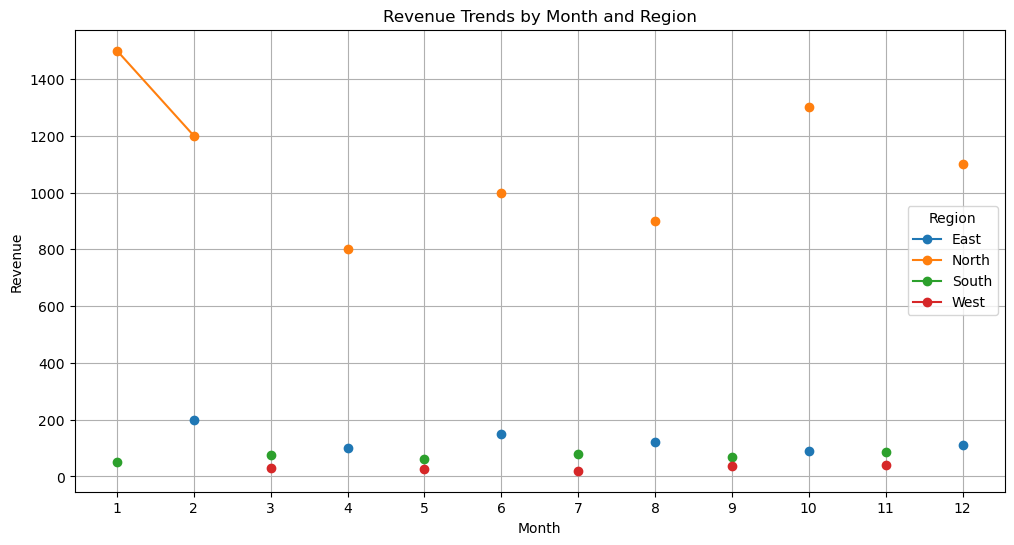


Most Profitable Product Categories:
ProductCategory
Electronics    3850
HomeGoods       460
Clothing        242
Books            98
Name: Profit, dtype: int64


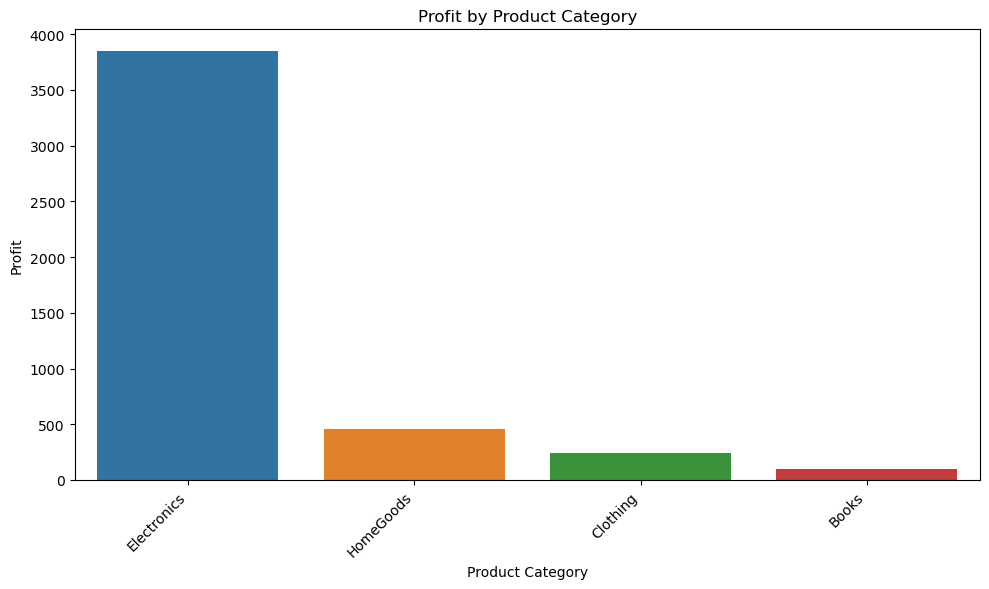


Low Performing Products:
ProductName
Mystery     13
Cookbook    17
Novel       20
Sci-Fi      23
History     25
Name: Profit, dtype: int64


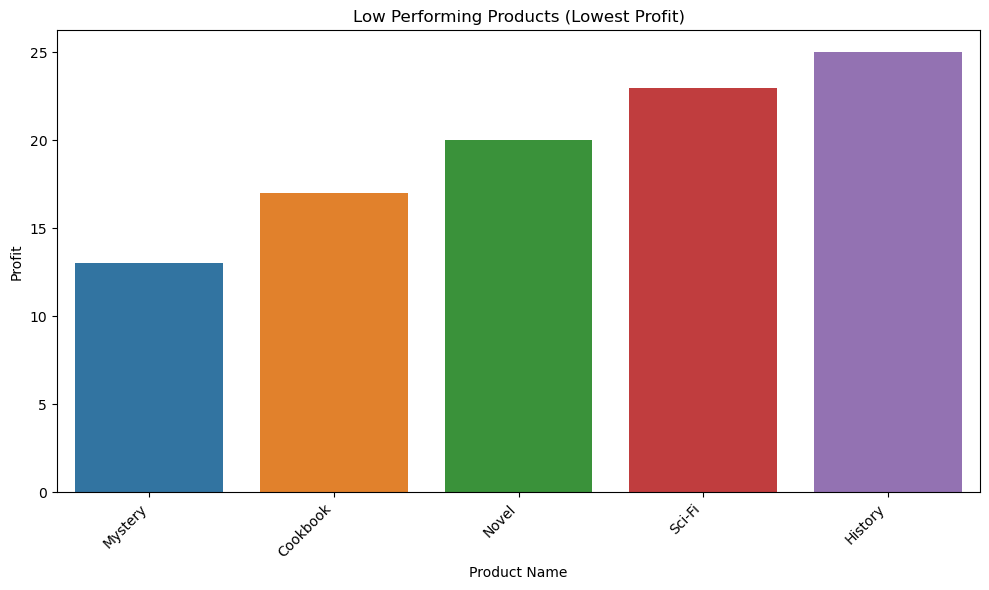


Full Data Table:
         Date Region ProductCategory ProductName  Revenue  Cost  Month  Profit
0  2023-01-01  North     Electronics      Laptop     1500   800      1     700
1  2023-01-15  South        Clothing     T-Shirt       50    20      1      30
2  2023-02-05  North     Electronics  Smartphone     1200   600      2     600
3  2023-02-20   East       HomeGoods        Lamp      200    80      2     120
4  2023-03-10   West           Books       Novel       30    10      3      20
5  2023-03-25  South        Clothing       Jeans       75    30      3      45
6  2023-04-02   East       HomeGoods      Pillow      100    40      4      60
7  2023-04-18  North     Electronics      Tablet      800   400      4     400
8  2023-05-08   West           Books    Cookbook       25     8      5      17
9  2023-05-22  South        Clothing       Dress       60    25      5      35
10 2023-06-12  North     Electronics  Headphones     1000   500      6     500
11 2023-06-28   East       HomeGoo

In [7]:

# Generate sample data
data = {
    'Date': pd.to_datetime(['2023-01-01', '2023-01-15', '2023-02-05', '2023-02-20', '2023-03-10', '2023-03-25',
'2023-04-02', '2023-04-18', '2023-05-08', '2023-05-22', '2023-06-12',
'2023-06-28',
'2023-07-07', '2023-07-21', '2023-08-03', '2023-08-19', '2023-09-14',
'2023-09-29',
'2023-10-06', '2023-10-23', '2023-11-11', '2023-11-27', '2023-12-09',
'2023-12-24']),
    'Region': ['North', 'South', 'North', 'East', 'West', 'South', 'East', 'North', 'West', 'South',
'North', 'East',
'West', 'South', 'North', 'East', 'West', 'South', 'North', 'East', 'West', 'South',
'North', 'East'],
    'ProductCategory': ['Electronics', 'Clothing', 'Electronics', 'HomeGoods', 'Books',
'Clothing', 'HomeGoods',
'Electronics', 'Books', 'Clothing', 'Electronics', 'HomeGoods', 'Books',
'Clothing',
'Electronics', 'HomeGoods', 'Books', 'Clothing', 'Electronics',
'HomeGoods', 'Books',
'Clothing', 'Electronics', 'HomeGoods'],

    'ProductName': ['Laptop', 'T-Shirt', 'Smartphone','Lamp', 'Novel', 'Jeans', 'Pillow',
'Tablet', 'Cookbook',
'Dress', 'Headphones', 'Vase', 'Mystery', 'Skirt', 'Smartwatch', 'Blanket', 'Sci-Fi', 'Sweater',
'Desktop', 'Candle', 'History', 'Jacket', 'Camera', 'Rug'],

    'Revenue': [1500, 50, 1200, 200, 30, 75, 100, 800, 25, 60, 1000, 150, 20, 80, 900,
120, 35, 70, 1300, 90, 40,
85, 1100, 110],
    'Cost': [800, 20, 600, 80, 10, 30, 40, 400, 8, 25, 500, 60, 7, 35, 450, 50, 12, 30, 650,
35, 15, 38, 550, 45]
}

df = pd.DataFrame(data)
df['Month'] = df['Date'].dt.month
df['Profit'] = df['Revenue'] - df['Cost']

# Revenue Trends by Month and Region
monthly_regional_revenue = df.groupby(['Month', 'Region'])['Revenue'].sum().unstack()
print('\nRevenue Trends by Month and Region:')
print(monthly_regional_revenue)

monthly_regional_revenue.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Revenue Trends by Month and Region')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1, 13))
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Most Profitable Product Categories
category_profit = df.groupby('ProductCategory')['Profit'].sum().sort_values(ascending=False)

print('\nMost Profitable Product Categories:')
print(category_profit)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify Low Performing Products
product_profit = df.groupby('ProductName')['Profit'].sum().sort_values()
print('\nLow Performing Products:')
print(product_profit.head())

plt.figure(figsize=(10, 6))
sns.barplot(x=product_profit.head().index, y=product_profit.head().values)
plt.title('Low Performing Products (Lowest Profit)')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Table of all data.

print('\nFull Data Table:')
print(df)

